In [1]:
import scanpy as sc
import scvelo as scv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Set good figure parameters for the whole notebook
scv.set_figure_params()

In [3]:
#Load data
data = sc.read_loom("CephalicE78_Filtered.loom")
data.var_names_make_unique()
data

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 4139 × 31053
    obs: 'Age', 'Batch', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'Cell_Conc', 'Chemistry', 'ChipID', 'Clusters', 'Comments', 'DBId', 'Date_Captured', 'DonorID', 'HPF_LogPP', 'Label', 'NGenes', 'Num_Pooled_Animals', 'Outliers', 'PCR_Cycles', 'Plug_Date', 'Project', 'Replicate', 'SampleID', 'SampleName', 'SampleOK', 'Sample_Index', 'ScrubletFlag', 'ScrubletScore', 'Seq_Comment', 'Sex', 'Species', 'Strain', 'Subset', 'Target_Num_Cells', 'Tissue', 'TotalUMI', 'Transcriptome', '_X', '_Y', 'cDNA_Lib_Ok', 'ngperul_cDNA'
    var: 'Accession', 'Chromosome', 'End', 'Gamma', 'Selected', 'Start', 'Strand', 'Valid'
    obsm: 'HPF', 'HPFVelocity', 'HPF_spliced', 'HPF_theta', 'HPF_unspliced', 'TSNE', 'TSNEVelocity', 'UMAP', 'UMAP3D', 'UMAPVelocity'
    varm: 'HPF', 'HPF_beta', 'MultilevelMarkers'
    layers: 'matrix', 'ambiguous', 'expected', 'pooled', 'spliced', 'spliced_exp', 'spliced_pooled', 'unspliced', 'unspliced_exp', 'unspliced_pooled'

In [4]:
#Preprocessing - Filter cells
sc.pp.filter_cells(data, min_genes=200)
sc.pp.filter_genes(data, min_cells=3)

#Preprocessing - Count mitochondrial genes
data.var['mt'] = data.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'Age' as categorical
... storing 'Chemistry' as categorical
... storing 'ChipID' as categorical
... storing 'Comments' as categorical
... storing 'Date_Captured' as categorical
... storing 'DonorID' as categorical
... storing 'Label' as categorical
... storing 'Plug_Date' as categorical
... storing 'Project' as categorical
... storing 'SampleID' as categorical
... storing 'SampleName' as categorical
... storing 'SampleOK' as categorical
... storing 'Sample_Index' as categorical
... storing 'Seq_Comment' as categorical
... storing 'Sex' as categorical
... storing 'Species' as categorical
... storing 'Strain' as categorical
... storing 'Subset' as categorical
... storing 'Tissue' as categorical
... storing 'Transcriptome' as categorical
... storing 'cDNA_Lib_Ok' as categorical
... storing 'ngperul_cDNA' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


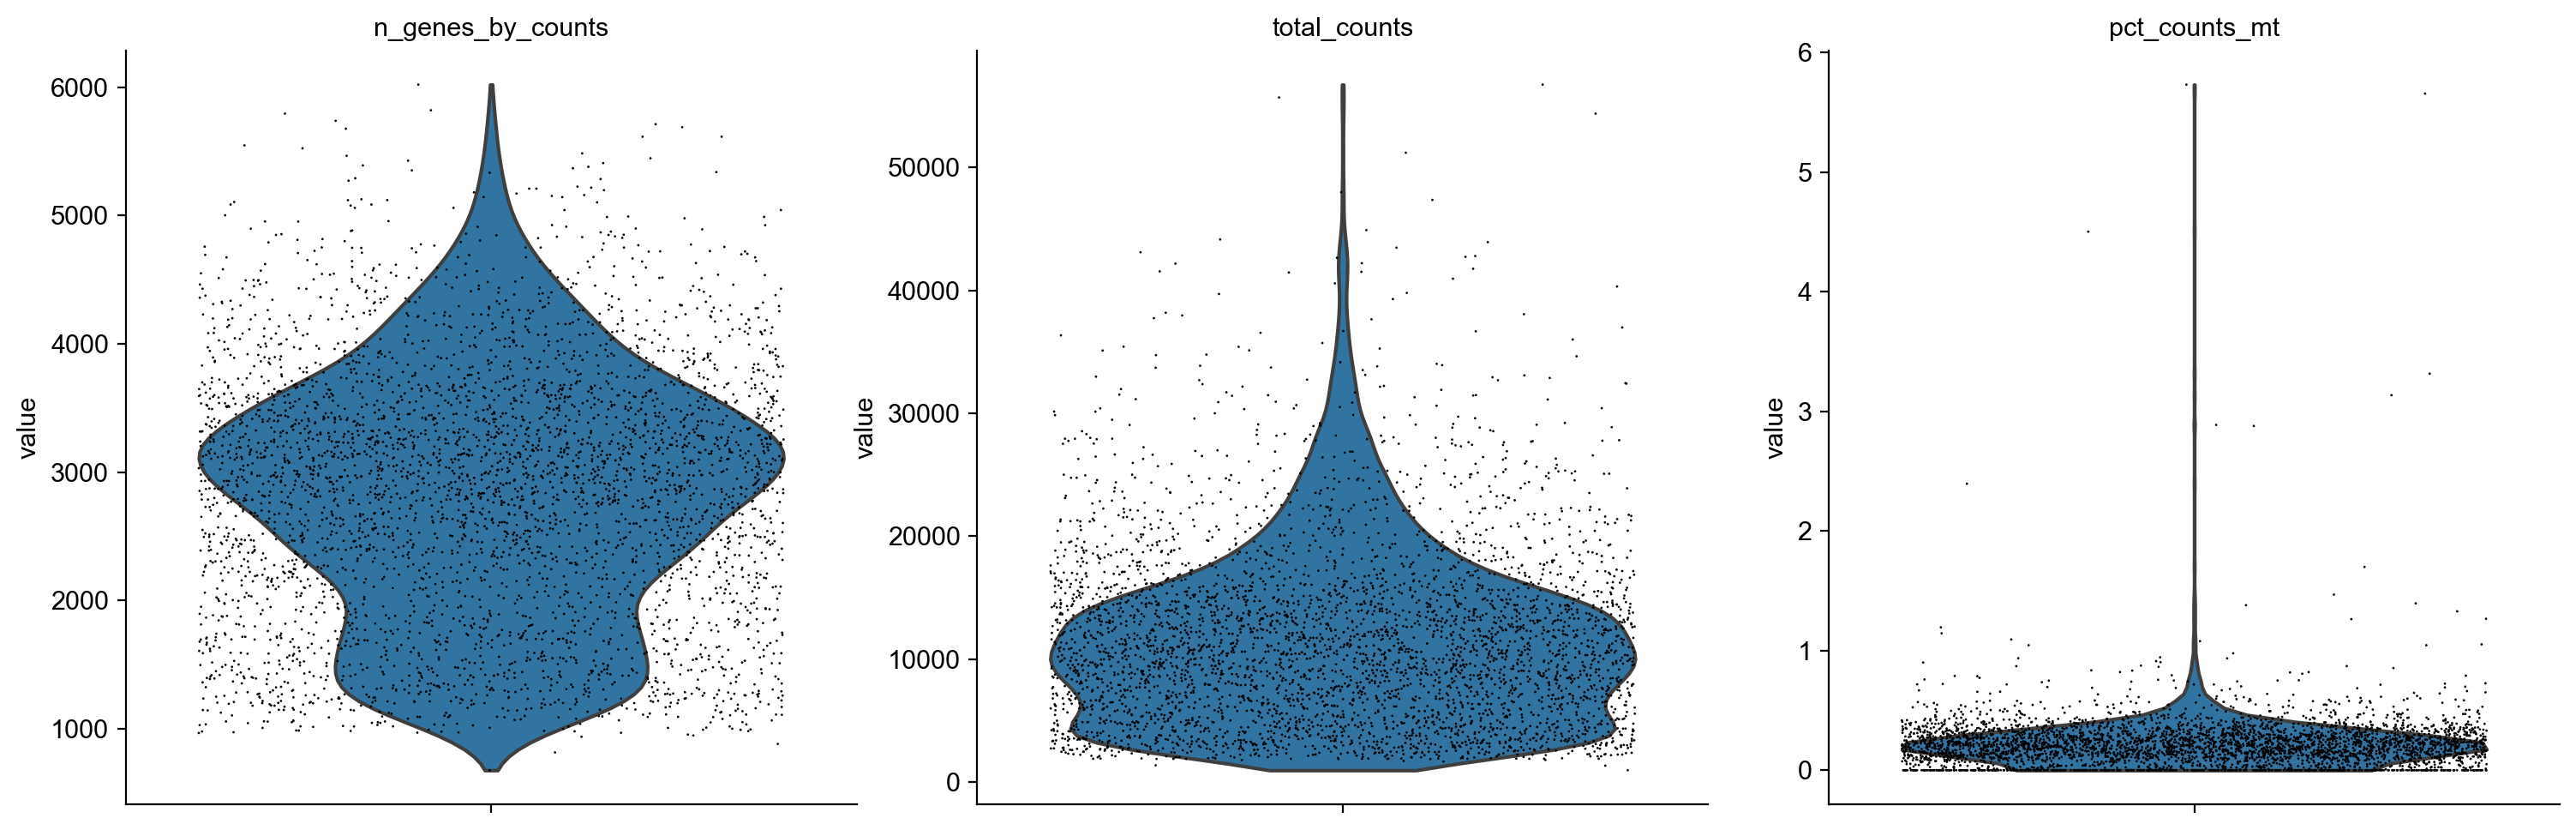

In [5]:
#Some statistics about the data (genes per cell, totals, percentage of mitochondrial genes)
sc.pl.violin(data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

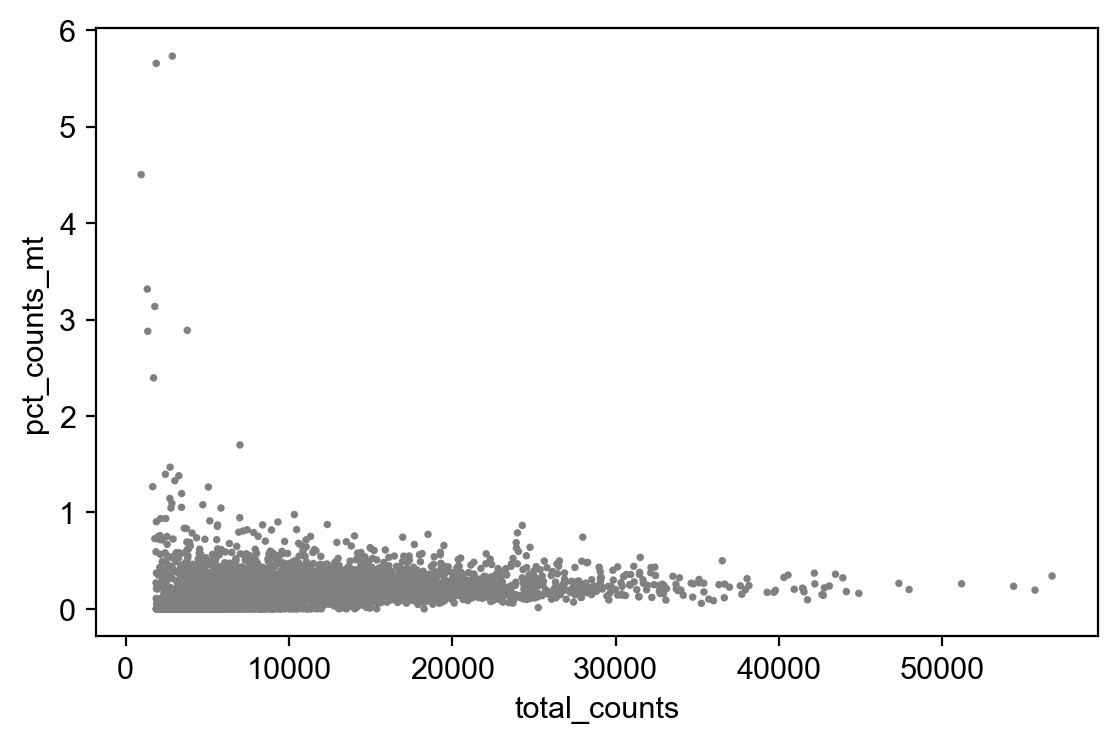

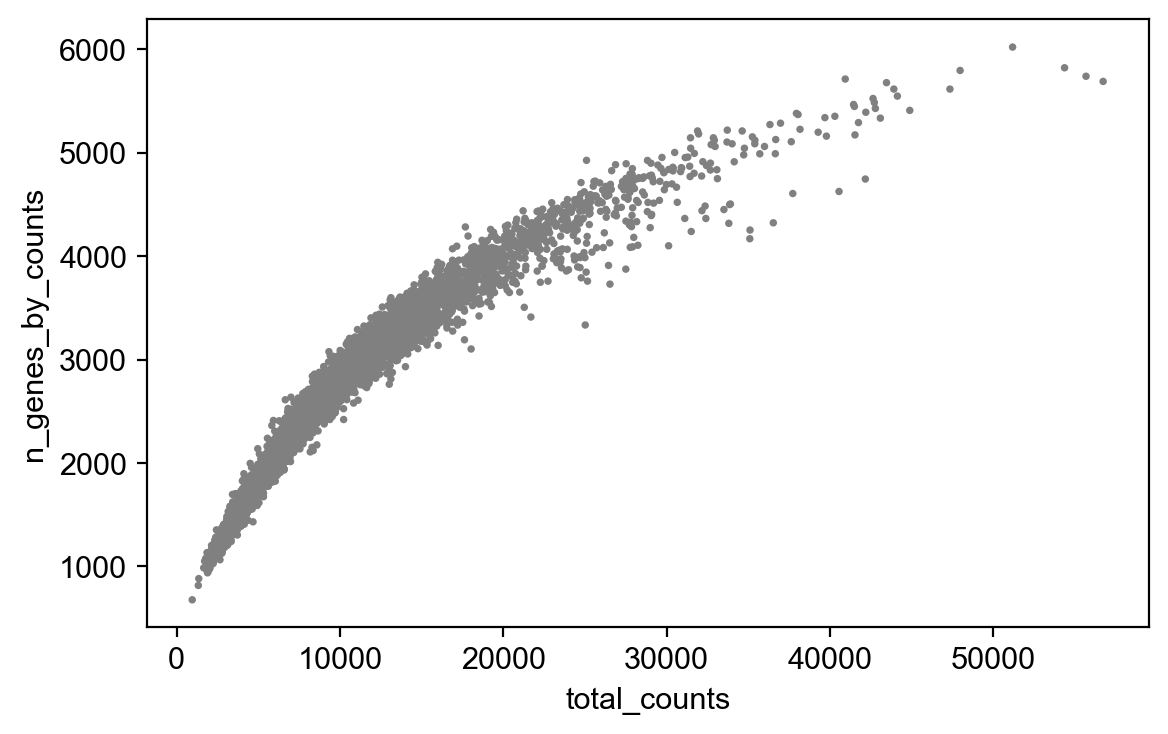

In [6]:
#Some statistics about the data
sc.pl.scatter(data, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(data, x='total_counts', y='n_genes_by_counts')

In [7]:
#Normalize the data (CPM technique)
sc.pp.normalize_total(data, target_sum=1e6)

sc.pp.log1p(data)

#Obtain highly variable genes
sc.pp.highly_variable_genes(data, n_top_genes = 5000)
#data = data[:, data.var.highly_variable]

#Scale the data
sc.pp.scale(data, max_value=10)

data

AnnData object with n_obs × n_vars = 4139 × 15690
    obs: 'Age', 'Batch', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'Cell_Conc', 'Chemistry', 'ChipID', 'Clusters', 'Comments', 'DBId', 'Date_Captured', 'DonorID', 'HPF_LogPP', 'Label', 'NGenes', 'Num_Pooled_Animals', 'Outliers', 'PCR_Cycles', 'Plug_Date', 'Project', 'Replicate', 'SampleID', 'SampleName', 'SampleOK', 'Sample_Index', 'ScrubletFlag', 'ScrubletScore', 'Seq_Comment', 'Sex', 'Species', 'Strain', 'Subset', 'Target_Num_Cells', 'Tissue', 'TotalUMI', 'Transcriptome', '_X', '_Y', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Accession', 'Chromosome', 'End', 'Gamma', 'Selected', 'Start', 'Strand', 'Valid', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'
    obsm: 'HPF', 'HPFVelocity', 'HPF_spliced', 'HPF_

In [8]:
#Run PCA
sc.tl.pca(data, svd_solver='arpack')

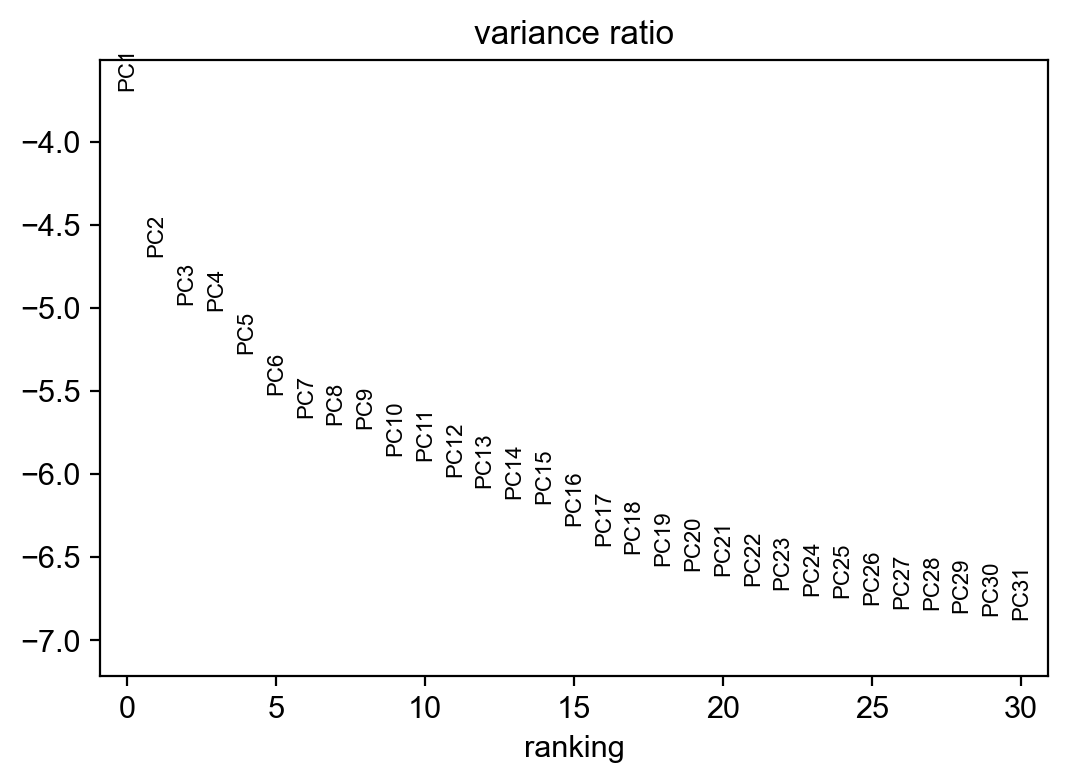

In [9]:
#Plot principal components importance and how much they explain the variance
sc.pl.pca_variance_ratio(data, log=True)

# FIGURE 2 G

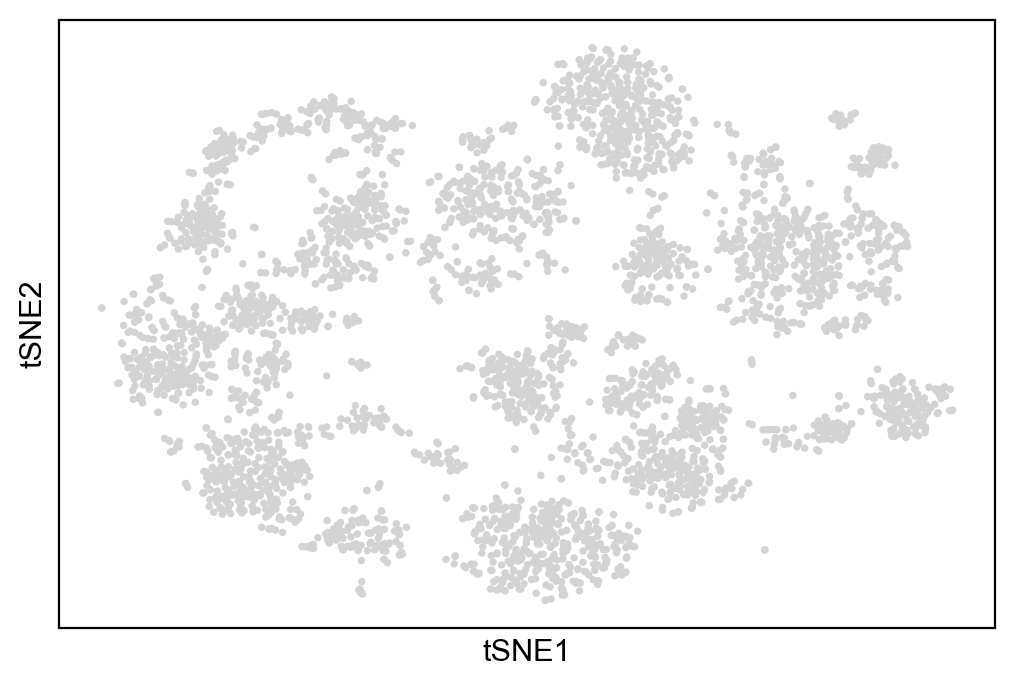

In [10]:
#Run neighbors and tsne to obtain an embedding of the data

sc.pp.neighbors(data)
sc.tl.tsne(data)
sc.pl.tsne(data)

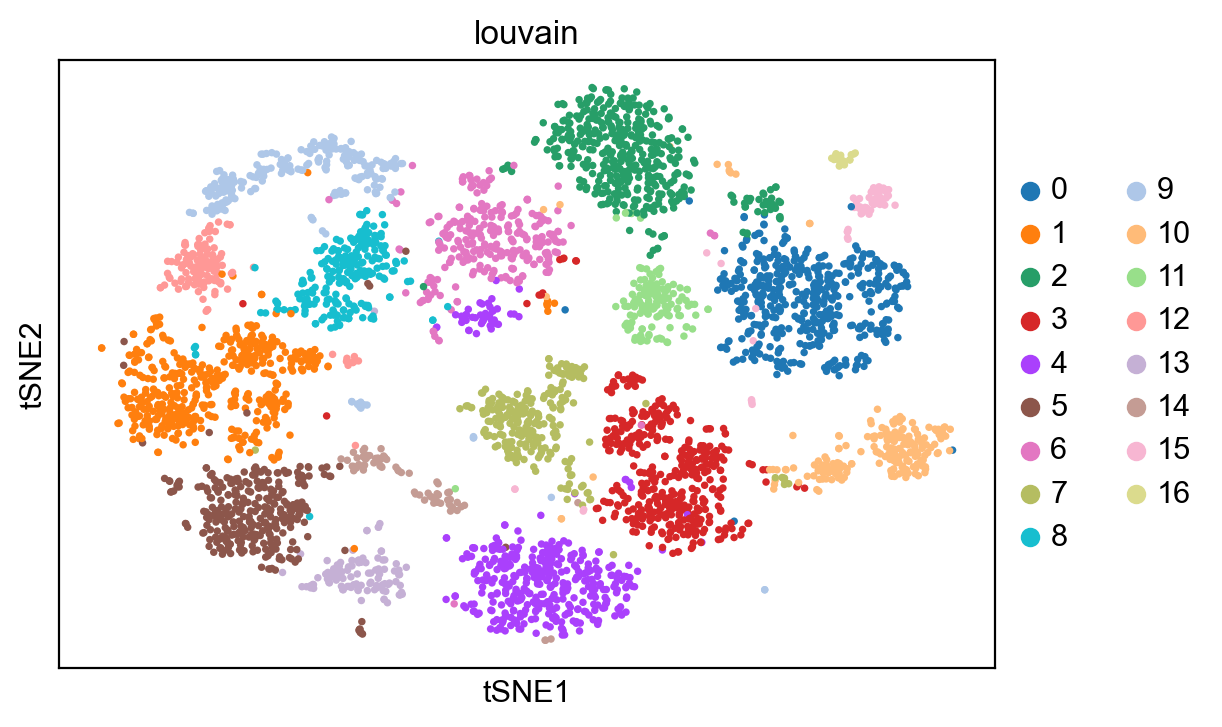

In [12]:
#Run louvain (clustering algorithm)

sc.tl.louvain(data, use_weights=True, resolution = 0.7)
sc.pl.tsne(data, color='louvain')

# FIGURE 2 H

In [13]:
#Obtain marker genes per cluster
sc.tl.rank_genes_groups(data, 'louvain', method='wilcoxon', n_genes = 100)

In [14]:
#Dataframe storing the marker genes per cluster
df = pd.DataFrame(data.uns['rank_genes_groups']['names'])
df.head(10)

0       1        2        3       4       5      6              7  \
0   Rps6   Rpl41     Rpl3    Gapdh  Igfbp2   Rpl41    Pkm          Pcbd1   
1   Rpl3   Rpl37   Hnrnpk      Ptn  Pcsk1n   Rpl37   Ldha         Crabp2   
2  Rplp0   Rpl36     Rps6     Npm1  Shisa2  Rpl37a   Npm1          Ccnd2   
3   Ybx1  Rpl37a   Eif4a1    Rpl26    Eras   Rplp1   Eno1  1700011H14Rik   
4   Ftl1   Rps21    Hspa8     Pgk1   Hesx1   Rpl36  Rpl26         Tagln2   
5   Rps2   Rplp1    H2afz  Fam181b    Mest   Rps21  Hspa8          Rpl26   
6  Acat2   Rplp2  Slc25a5      Ncl   Rpl26   Rpl12  Rps27         Crabp1   
7  Rps19   Rpl12  Slc25a4      Wls     Rax   Rps15    Ncl          Hoxb2   
8    Erh   Rpl31    Rplp0  Hsp90b1    Lhx2   Hesx1  Gapdh         Rpl18a   
9    Vim   Rps15     Ybx1   Akr1b3   Fezf1   Rpl31   Pgk1       Hotairm1   

        8        9       10       11        12      13      14       15  \
0  Rpl23a  Hoxaas3  Fam212a  Slc25a4  Hotairm1   Cldn6   Foxa2   Tmsb4x   
1   Rpl41     Cdx2     Pfn1    Rplp0     Rpl41   Epcam    Car4    Tubb3   
2   Rpl37   Ifitm1   Crabp1      Mdk     Rplp1   Cldn7  Igfbp5     Dll3   
3  Rpl37a     Cdx1  Slc25a5     Rpl3     Rpl37   Krt18  Cdkn1c   Cdkn1c   
4  Rpl36a     Cdx4    Eif5a     Lhx2     Rpl36  Spint2    Gpc3      Vim   
5   Rps26     Rbp1     Lmo4     Rps6     Hoxa1    Krt8   Cald1     Hes6   
6   Rps21    Hoxb8     Sub1     Dlk1    Rpl37a  Slc2a3   Ptch1    Map1b   
7   Rplp2  Hoxb5os     Plp1      Ran     Rps21   Rab25   Tgfb2  Gadd45g   
8   Rps29   Cited1     Nme1    H2afz     Pcbd1  Phlda1  Nkx2-9   Tubb2b   
9   Rpl36   Phlda2     Ets1      Erh     Rplp2   Wfdc2  Nkx6-1   Btbd17   

         16  
0  Ppp1r14a  
1      Isl1  
2     Cotl1  
3      Hes6  
4     Tubb3  
5      Krt8  
6      Pfn1  
7  Trp53i11  
8    Tmsb4x  
9   Neurog1

In [15]:
#First set of markers identified:
#By hand, plot the dotplot multiple times and sequentially exclude non specific markers 
markers = ['Msx3', 'En1', 'Pax5', 'Wnt1', 'Slc25a5', 'Shisa2', 'Eras', 'Lhx2', 'Rax', 'Hesx1', 'Fezf1', 'Irs4',
          '1700011H14Rik', 'Hoxaas3', 'Cdx2', 'Cdx1', 'Cdx4', 'Hoxb8', 'Hoxb9', 'Hoxa7',
          'Fam212a', 'Plp1', 'Ets1', 'Phactr1', 
          'Hotairm1', 'Hoxa1', 'Cldn6', 'Epcam', 'Cldn7', 'Rab25', 'Tmem54',
          'Foxa2', 'Tgfb2', 'Nkx2-9', 'Nkx6-1', 'Hsd11b2',
          'Dll3', 'Gadd45g','Plk3', 
          'Ppp1r14a', 'Pfn1', 'Isl1', 'Neurog1', 'Tlx2']

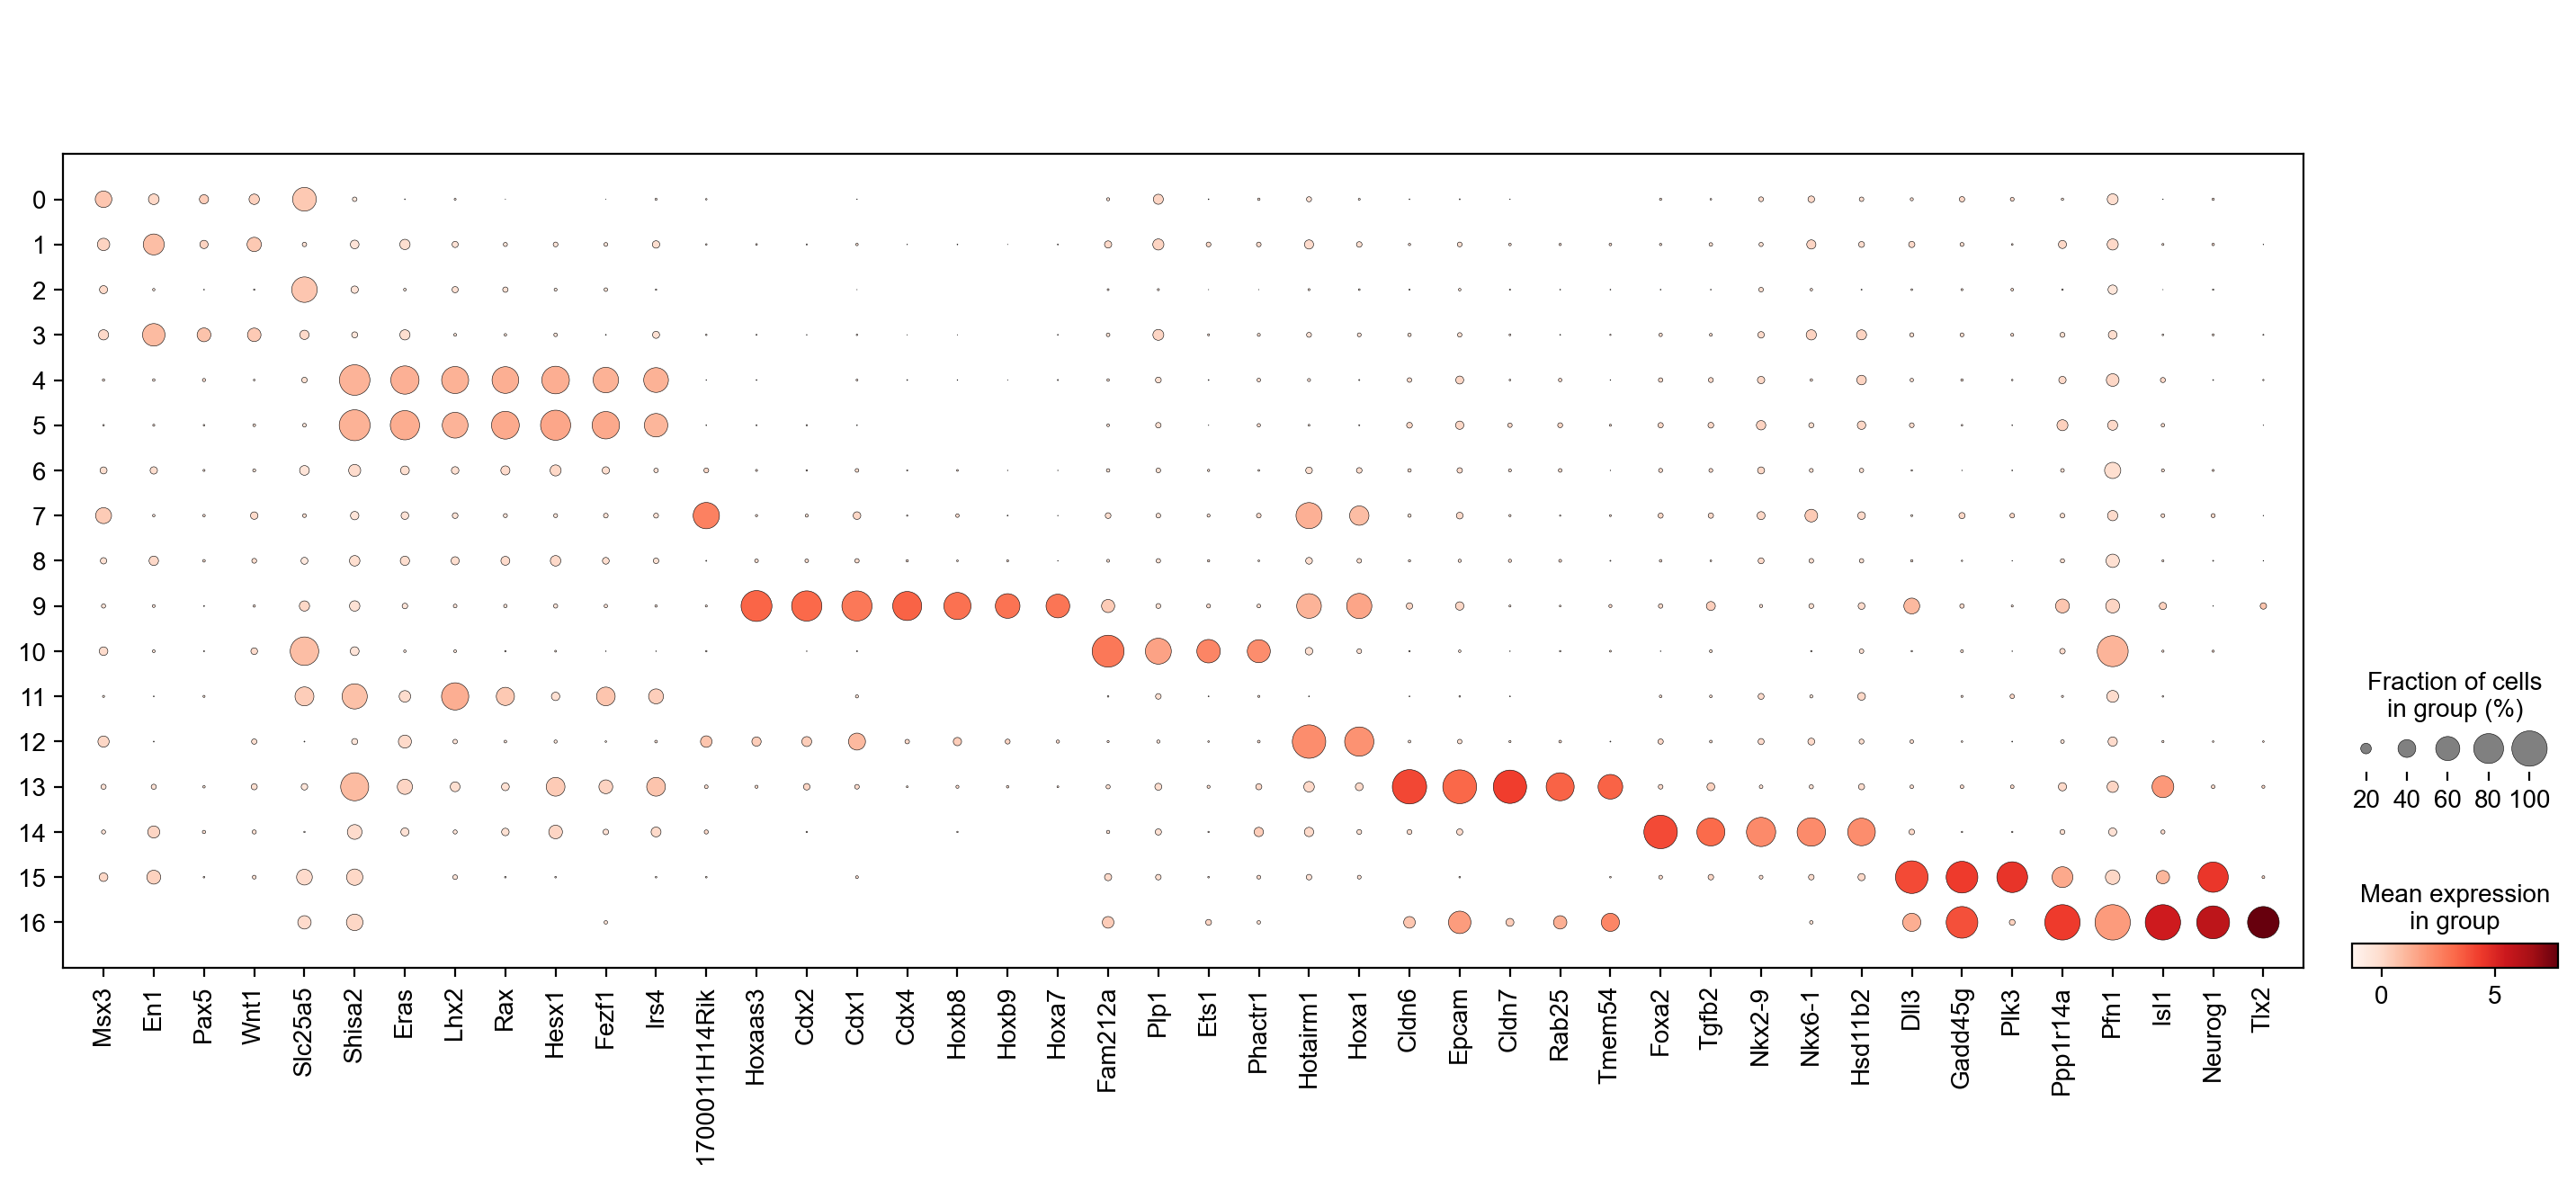

In [16]:
#Dotplot obtained from the first set of markers identified
gs = sc.pl.dotplot(data, markers, groupby='louvain', expression_cutoff = 0.5)

In [17]:
#Create Groups, containing the 'real' groups based on genes expressed by the louvain clusters
#Some clusters are merged (4 and 5, 15 and 16, 7 and 12)

data.obs['Groups'] = data.obs.louvain
data.obs['Groups'] = data.obs['Groups'].astype('int32')
for i,j in data.obs.iterrows():
    if (j['Groups'] == 0):
        data.obs.Groups[i] = 'Group 0'
    if (j['Groups'] == 1):
        data.obs.Groups[i] = 'Group 1'
    if (j['Groups'] == 2):
        data.obs.Groups[i] = 'Group 2'
    if (j['Groups'] == 3):
        data.obs.Groups[i] = 'Group 1'
    if (j['Groups'] == 4):
        data.obs.Groups[i] = 'Group 3'
    if (j['Groups'] == 5):
        data.obs.Groups[i] = 'Group 3'
    if (j['Groups'] == 6):
        data.obs.Groups[i] = 'Group 4'
    if (j['Groups'] == 7):
        data.obs.Groups[i] = 'Group 5'
    if (j['Groups'] == 8):
        data.obs.Groups[i] = 'Group 6'
    if (j['Groups'] == 9):
        data.obs.Groups[i] = 'Group 7'
    if (j['Groups'] == 10):
        data.obs.Groups[i] = 'Group 8'
    if (j['Groups'] == 11):
        data.obs.Groups[i] = 'Group 9'
    if (j['Groups'] == 12):
        data.obs.Groups[i] = 'Group 5'
    if (j['Groups'] == 13):
        data.obs.Groups[i] = 'Group 10'
    if (j['Groups'] == 14):
        data.obs.Groups[i] = 'Group 11'
    if (j['Groups'] == 15):
        data.obs.Groups[i] = 'Group 12'
    if (j['Groups'] == 16):
        data.obs.Groups[i] = 'Group 12'

#data.rename_categories('louvain', new_cluster_names)

In [18]:
#New list of markers, based on the cluster merging
new_markers = ['Msx3', 'En1', 'Pax5', 'Wnt1', 'Eras', 'Rax', 'Hesx1', 'Fezf1', 'Irs4',
          '1700011H14Rik', 'Hotairm1', 'Hoxa1', 'Hoxaas3', 'Cdx2', 'Cdx4', 
          'Hoxb9', 'Hoxa7',
          'Fam212a', 'Plp1', 'Ets1', 'Phactr1', 'Cldn6', 'Epcam', 'Cldn7', 'Rab25', 'Tmem54',
          'Foxa2', 'Tgfb2', 'Nkx2-9', 'Nkx6-1', 'Hsd11b2',
          'Gadd45g','Plk3', 
          'Neurog1', 'Sct', 'Rassf4']

... storing 'Groups' as categorical


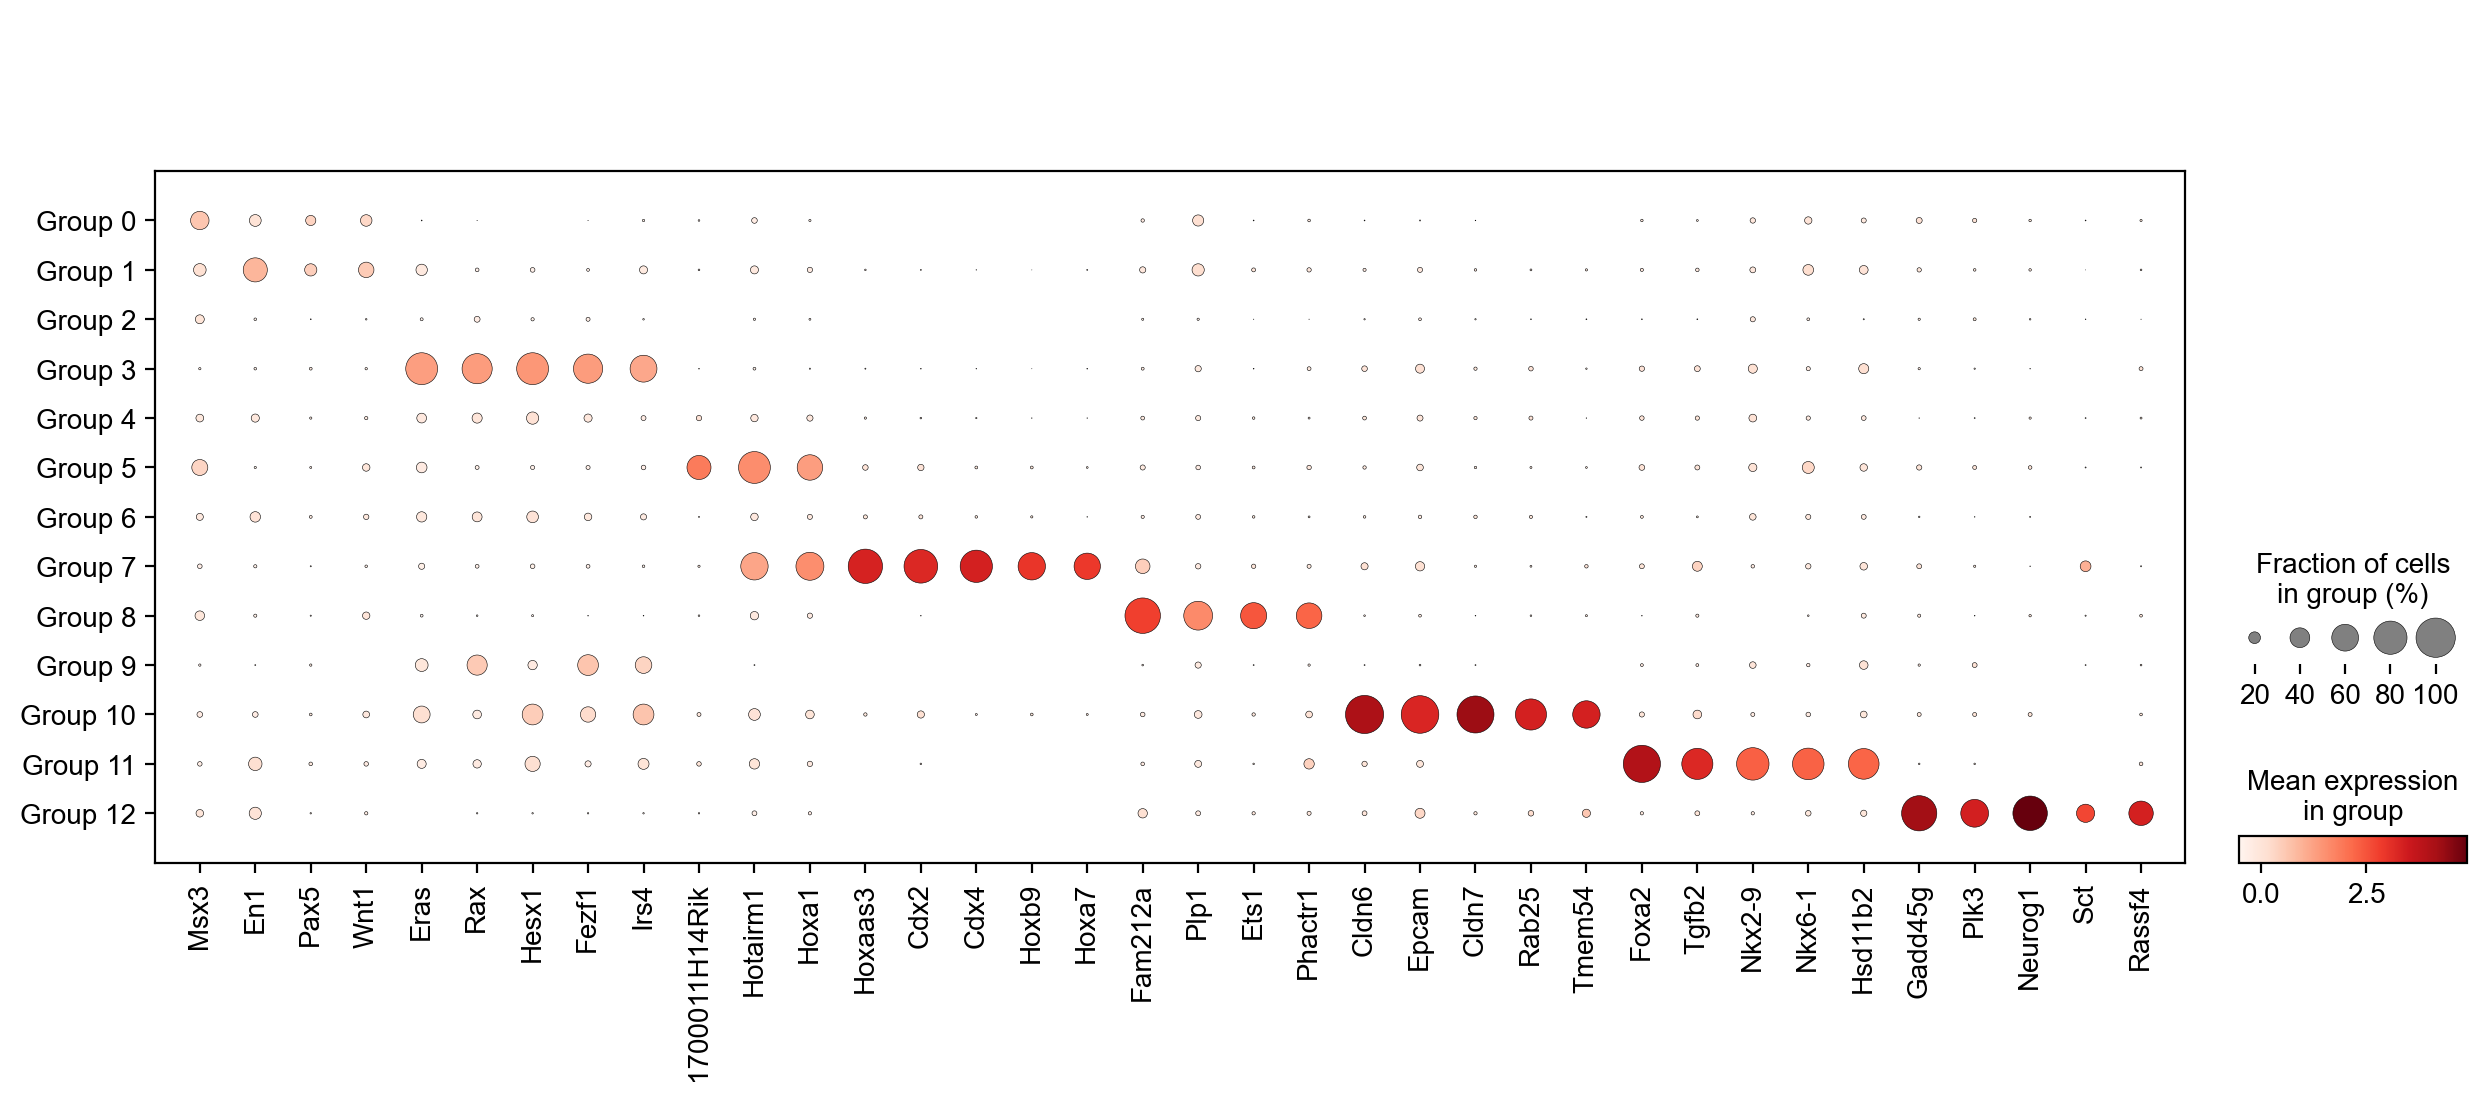

In [19]:
#Dotplot obtained from the new list of markers
gs = sc.pl.dotplot(data, new_markers, groupby='Groups', expression_cutoff = 0.5)

In [24]:
#Create Name, containing the cell types of groups previously identified
#Cell types are obtained from the paper + from the mouse brain atlas
data.obs['Name'] = data.obs['Groups'].astype(str)
for i,j in data.obs.iterrows():
    if (j['Groups'] == 'Group 0'):
        data.obs.Name[i] = 'NEpitH'
    if (j['Groups'] == 'Group 1'):
        data.obs.Name[i] = 'NEpitMd'
    if (j['Groups'] == 'Group 3'):
        data.obs.Name[i] = 'NEpitA2'
    if (j['Groups'] == 'Group 5'):
        data.obs.Name[i] = 'NEpitC'
    if (j['Groups'] == 'Group 7'):
        data.obs.Name[i] = 'NMP'
    if (j['Groups'] == 'Group 8'):
        data.obs.Name[i] = 'NEpitB'
    if (j['Groups'] == 'Group 10'):
        data.obs.Name[i] = 'NEpitA3'
    if (j['Groups'] == 'Group 11'):
        data.obs.Name[i] = 'NEpitML'
    if (j['Groups'] == 'Group 12'):
        data.obs.Name[i] = 'ENbl'
    if (j['Groups'] == 'Group 2'):
        data.obs.Name[i] = 'Unknown 1'
    if (j['Groups'] == 'Group 4'):
        data.obs.Name[i] = 'Unknown 2'
    if (j['Groups'] == 'Group 6'):
        data.obs.Name[i] = 'Unknown 3'
    if (j['Groups'] == 'Group 9'):
        data.obs.Name[i] = 'Unknown 4'

In [25]:
#change marker order to make the dotplot prettier
final_markers = ['Gadd45g','Plk3', 'Neurog1', 'Sct', 'Rassf4', 
                'Eras', 'Rax', 'Hesx1', 'Fezf1', 'Irs4',
                'Cldn6', 'Epcam', 'Cldn7', 'Rab25', 'Tmem54',
                'Fam212a', 'Plp1', 'Ets1', 'Phactr1',
                '1700011H14Rik', 'Hotairm1', 'Hoxa1', 
                 'Msx3', 
                'Foxa2', 'Tgfb2', 'Nkx2-9', 'Nkx6-1', 'Hsd11b2',
                'En1', 'Pax5', 'Wnt1',
                'Hoxaas3', 'Cdx2', 'Cdx4', 'Hoxb9', 'Hoxa7',]

... storing 'Name' as categorical


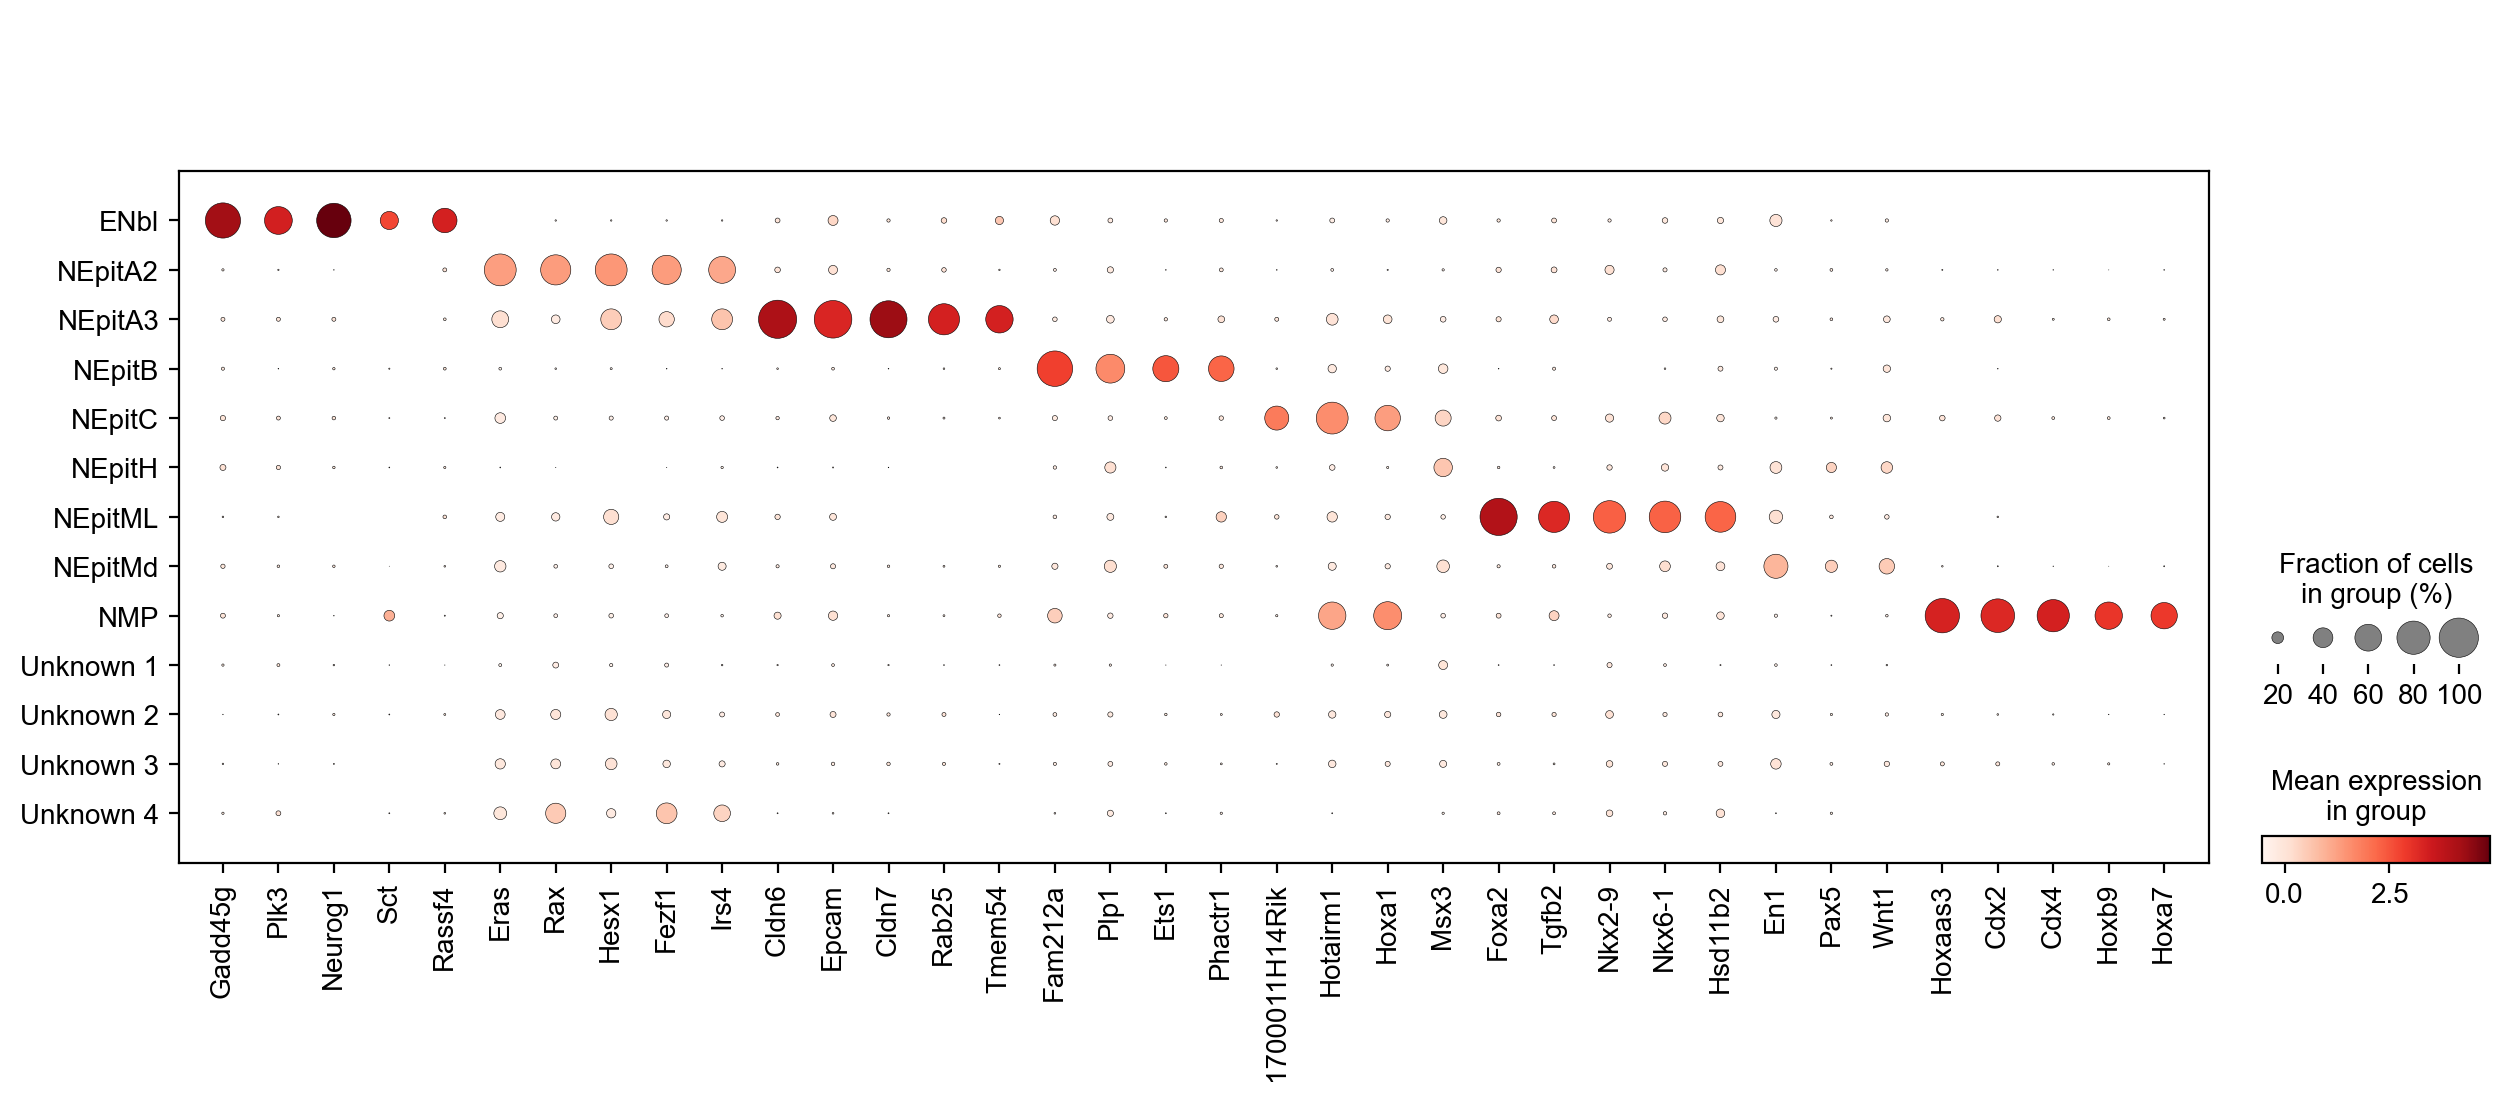

In [26]:
#FINAL DOTPLOT
gs = sc.pl.dotplot(data, final_markers, groupby='Name', expression_cutoff = 0.5)

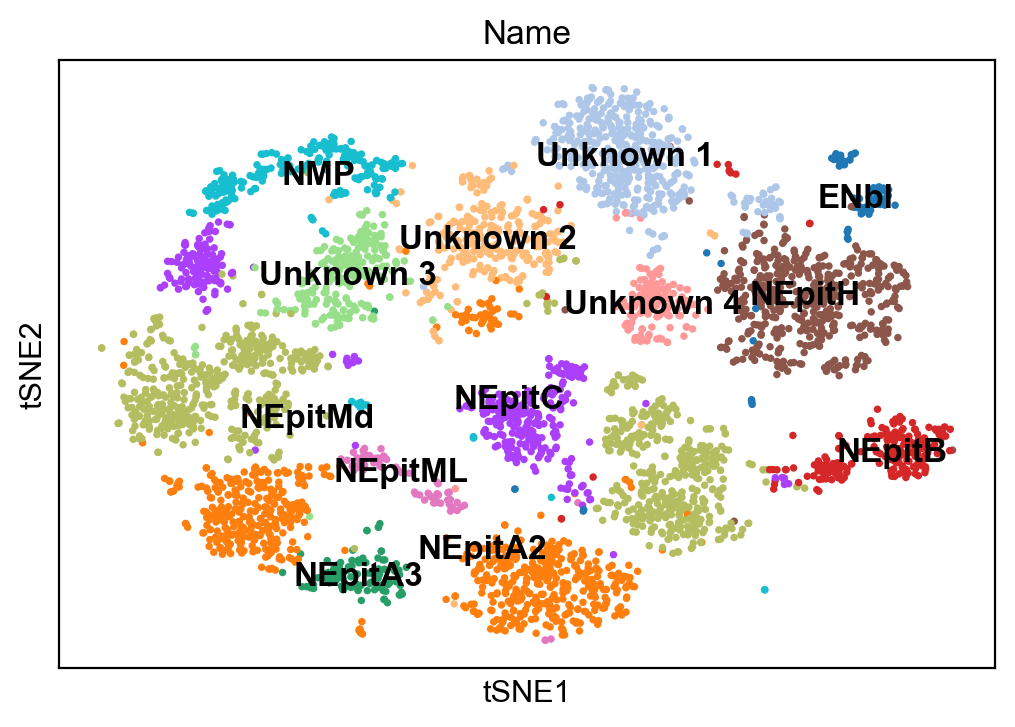

In [27]:
#REFAIRE TSNE AVEC LES CLUSTERS IDENTIFIÉS

sc.pl.tsne(data, color = 'Name', legend_loc = 'on data')

# FIGURE 2 I

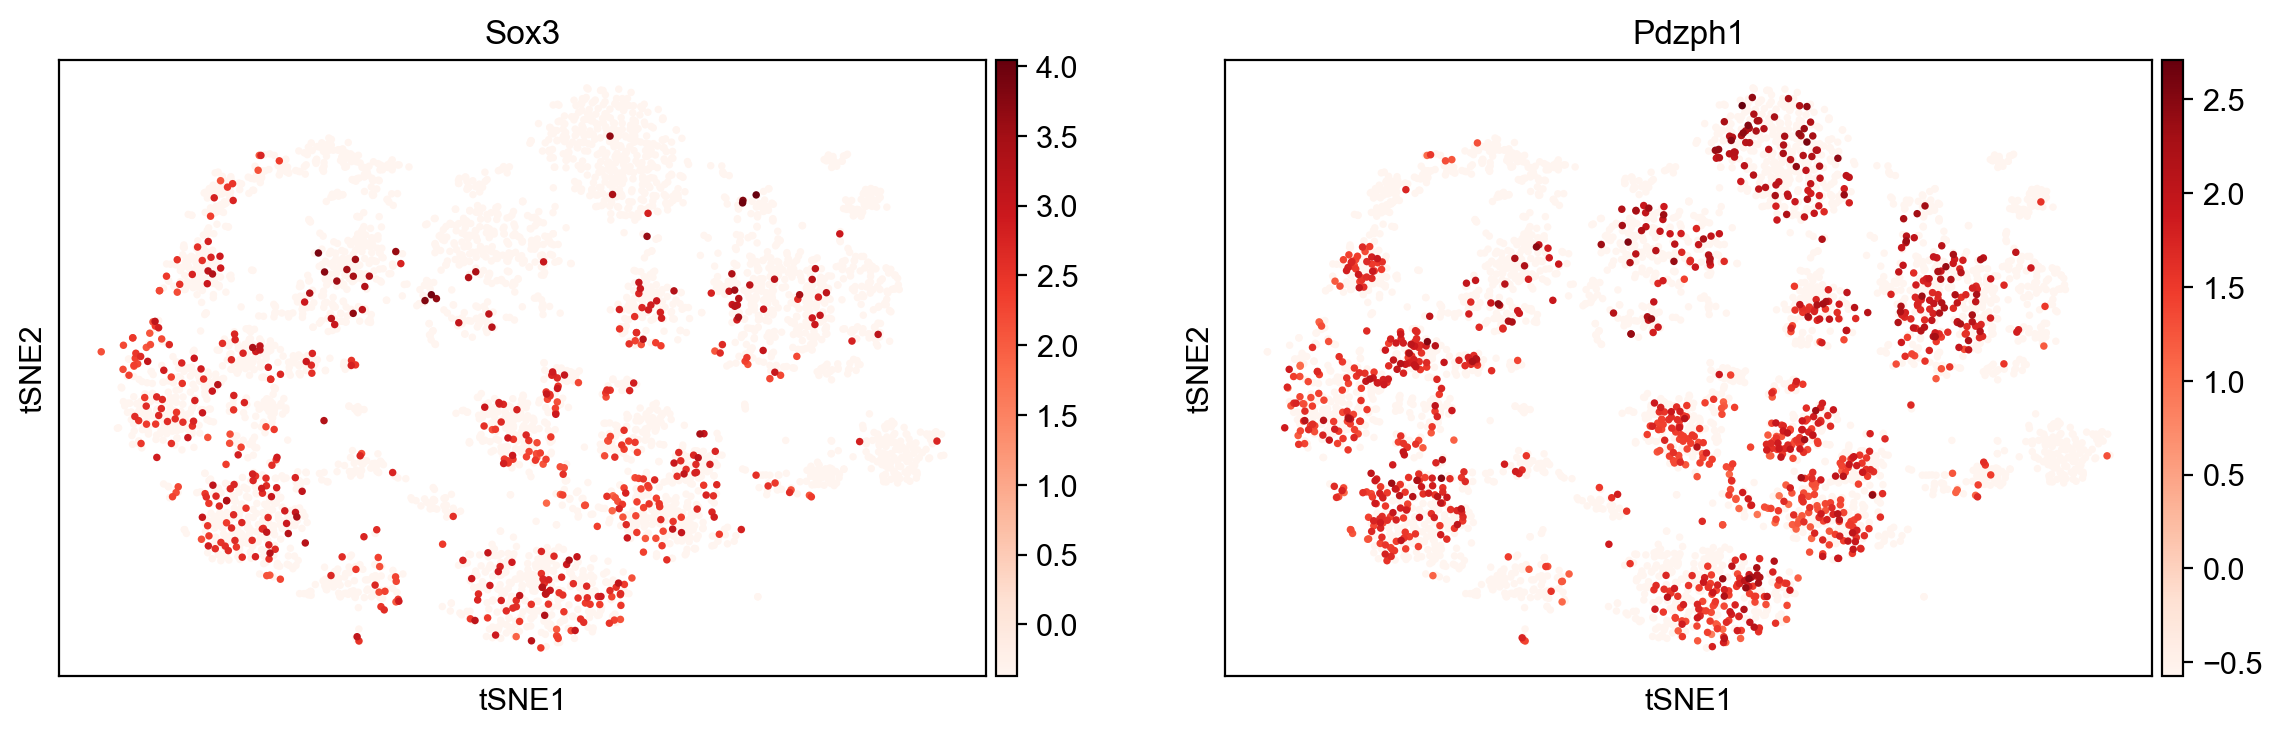

In [29]:
sc.pl.tsne(data, color = ['Sox3', 'Pdzph1'], cmap = 'Reds')

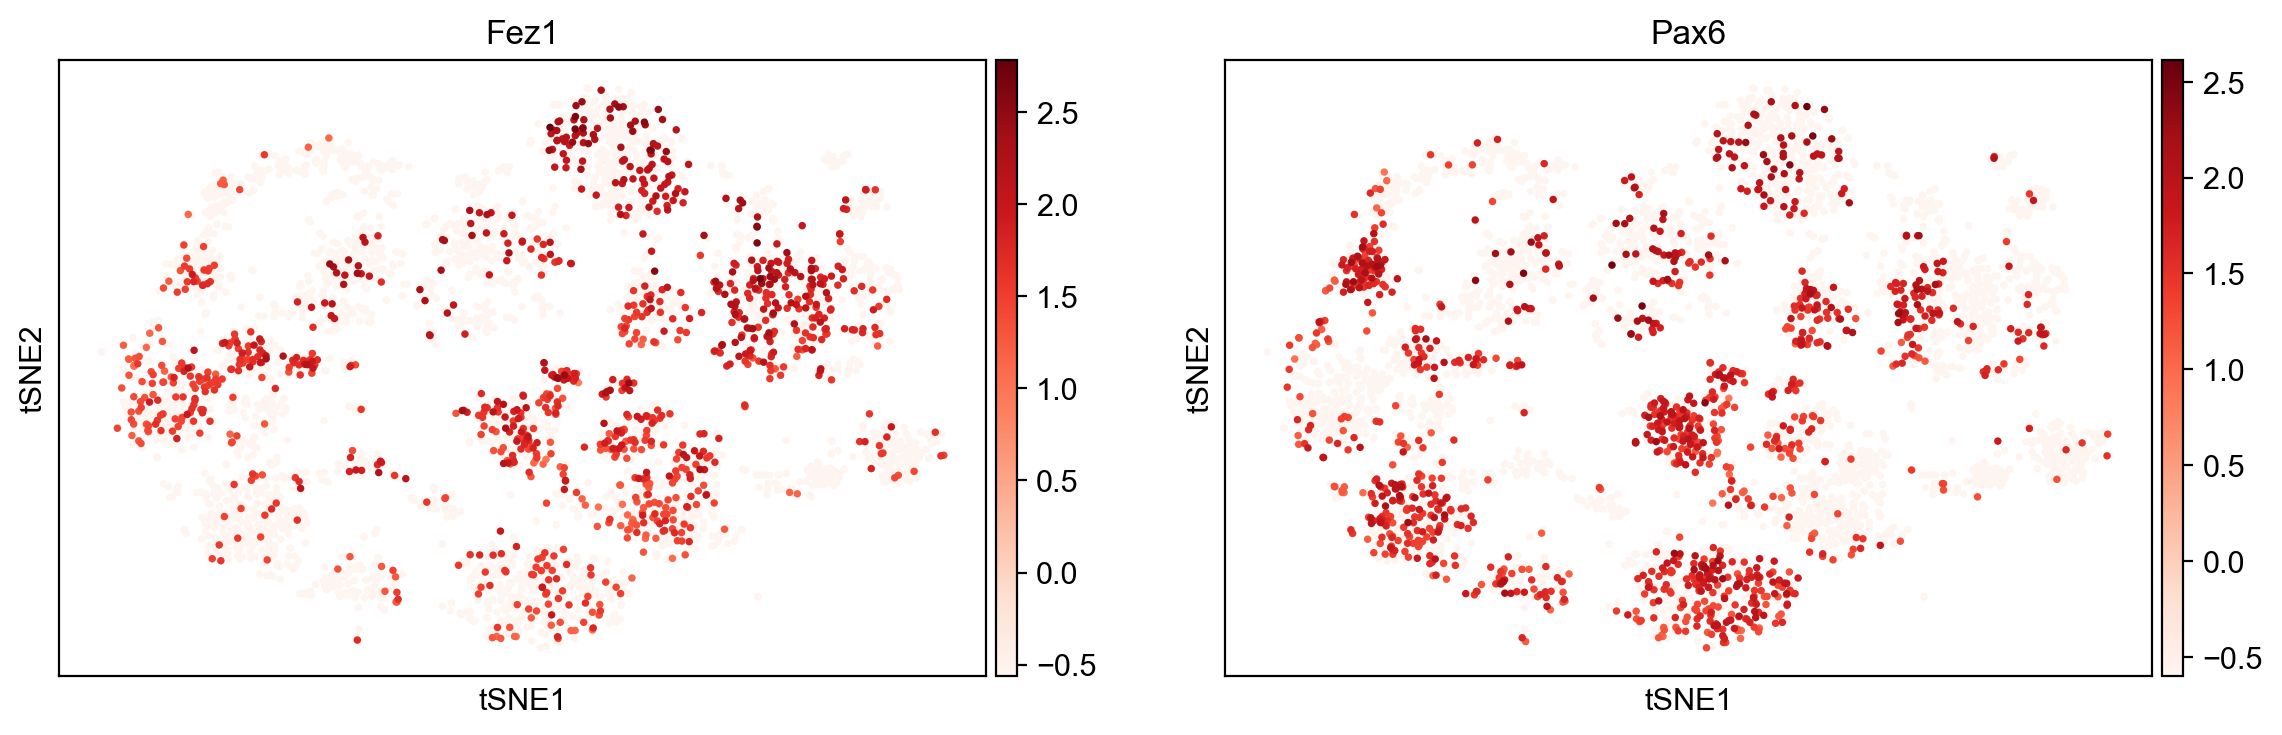

In [30]:
sc.pl.tsne(data, color = ['Fez1', 'Pax6'], cmap = 'Reds')

# EXTENSION ANALYSIS

## 1) SCVELO

In [3]:
#Load data through scvelo
a_scv = scv.read("CephalicE78_Filtered.loom", cache=True)
a_scv.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
#Preprocessing
scv.pp.filter_and_normalize(a_scv)
scv.pp.moments(a_scv)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:18) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [6]:
#Compute velocities
scv.tl.velocity(a_scv, mode='stochastic')

computing velocities
    finished (0:00:25) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
#Compute velocity graph
scv.tl.velocity_graph(a_scv)

computing velocity graph
    finished (0:00:40) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [8]:
#Set UMAP coordinates from the authors 
a_scv.obsm['X_umap'] = a_scv.obsm['UMAP']

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


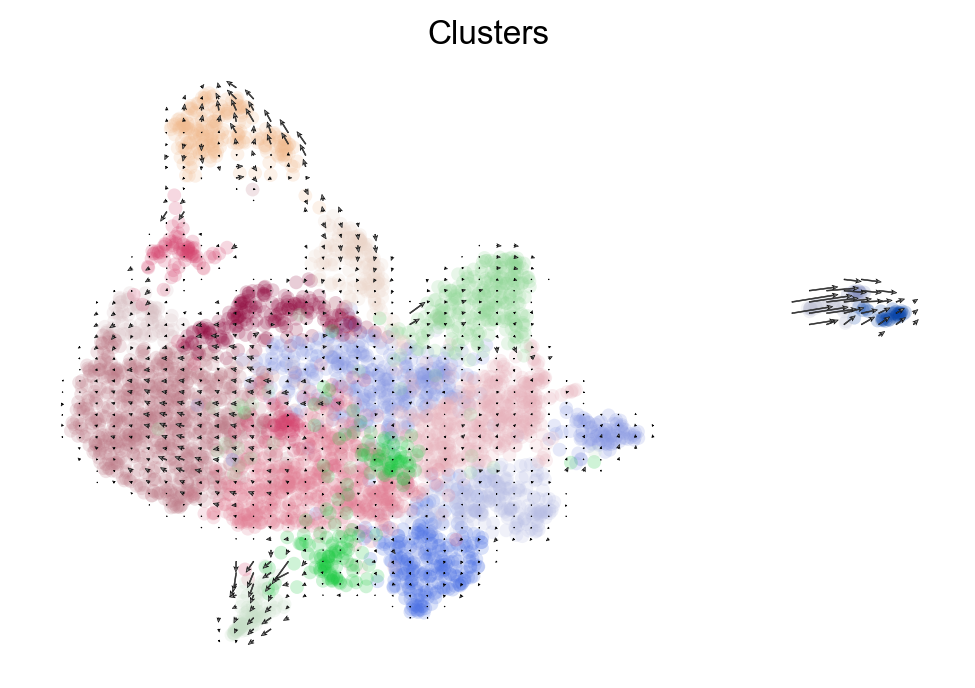

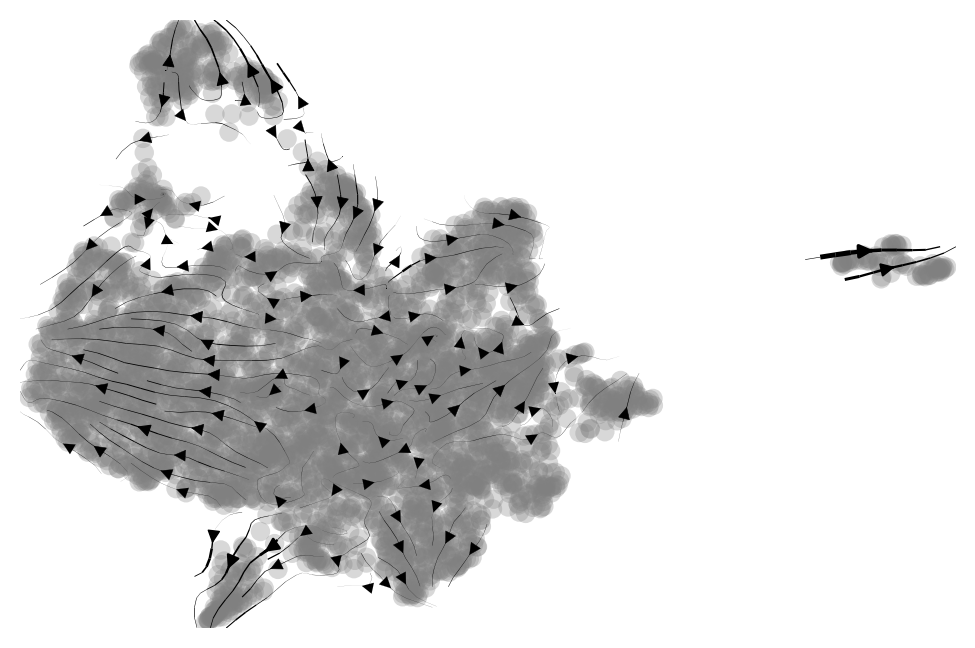

In [9]:
#Plot velocities on the authors UMAP
scv.pl.velocity_embedding_grid(a_scv, basis='X_umap', color = 'Clusters')
scv.pl.velocity_embedding_stream(a_scv, basis='X_umap')

In [10]:
#Rename clusters by cell types

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

a_scv.obs['Name'] = a_scv.obs.Clusters.astype('int32')
for i,j in a_scv.obs.iterrows():
    if (j['Name'] == 0):
        a_scv.obs.Name[i] = 'ENbl'
    if (j['Name'] == 1):
        a_scv.obs.Name[i] = 'ENbl'
    if (j['Name'] == 2):
        a_scv.obs.Name[i] = 'ENbl'
    if (j['Name'] == 3):
        a_scv.obs.Name[i] = 'NEpitA3'
    if (j['Name'] == 4):
        a_scv.obs.Name[i] = 'NEpitA2'
    if (j['Name'] == 5):
        a_scv.obs.Name[i] = 'NEpitA1'
    if (j['Name'] == 6):
        a_scv.obs.Name[i] = 'NEpitMd'
    if (j['Name'] == 7):
        a_scv.obs.Name[i] = 'NEpitH'
    if (j['Name'] == 8):
        a_scv.obs.Name[i] = 'NEpitMH'
    if (j['Name'] == 9):
        a_scv.obs.Name[i] = 'NEpitH'
    if (j['Name'] == 10):
        a_scv.obs.Name[i] = 'NEpit3'
    if (j['Name'] == 11):
        a_scv.obs.Name[i] = 'NEpit4'
    if (j['Name'] == 12):
        a_scv.obs.Name[i] = 'NEpit2'
    if (j['Name'] == 13):
        a_scv.obs.Name[i] = 'NEpitB'
    if (j['Name'] == 14):
        a_scv.obs.Name[i] = 'NEpitML'
    if (j['Name'] == 15):
        a_scv.obs.Name[i] = 'NEpitC'
    if (j['Name'] == 16):
        a_scv.obs.Name[i] = 'NMP'

In [25]:
#Set parameters for PAGA
a_scv.uns['neighbors']['distances'] = a_scv.obsp['distances']
a_scv.uns['neighbors']['connectivities'] = a_scv.obsp['connectivities']

#Set cell types as categories
a_scv.obs.Name = a_scv.obs.Name.astype('category')

#Run PAGA with velocities previously calculated
scv.tl.paga(a_scv, groups='Name')

#Obtain transition probabilities table
df = scv.get_df(a_scv, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Reds').format('{:.2g}')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


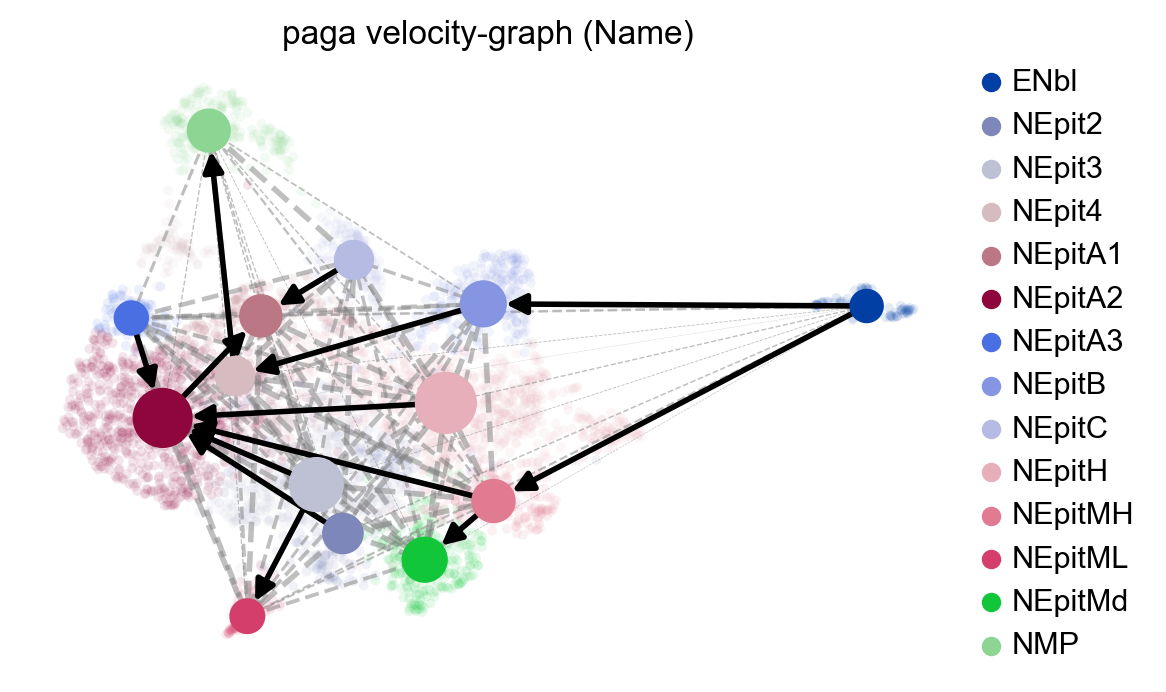

In [26]:
#Plot PAGA transitions with cell types
scv.pl.paga(a_scv, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

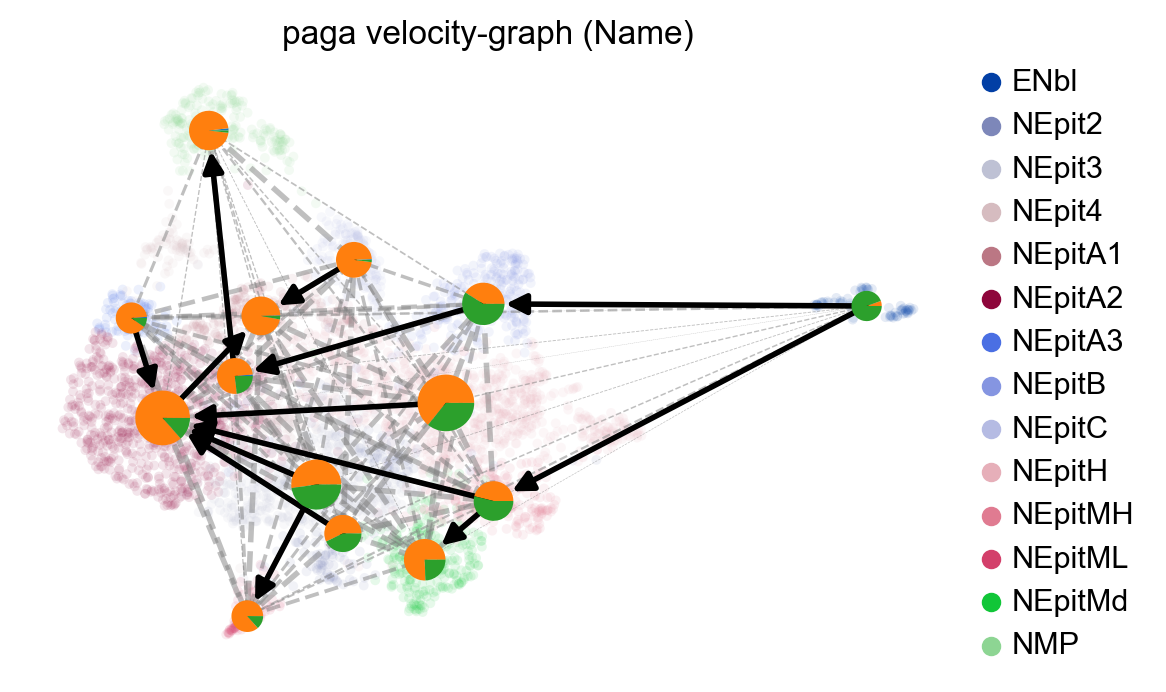

In [27]:
#Show proportions of cells from each age on previous graph (orange is E8, green is E8.5)
scv.pl.paga(a_scv, color = 'Age', basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

# 2) Cell cycle

In [2]:
#Load data in scanpy
cycle = sc.read_loom("CephalicE78_Filtered.loom")
cycle.var_names_make_unique()
cycle

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 4139 × 31053
    obs: 'Age', 'Batch', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'Cell_Conc', 'Chemistry', 'ChipID', 'Clusters', 'Comments', 'DBId', 'Date_Captured', 'DonorID', 'HPF_LogPP', 'Label', 'NGenes', 'Num_Pooled_Animals', 'Outliers', 'PCR_Cycles', 'Plug_Date', 'Project', 'Replicate', 'SampleID', 'SampleName', 'SampleOK', 'Sample_Index', 'ScrubletFlag', 'ScrubletScore', 'Seq_Comment', 'Sex', 'Species', 'Strain', 'Subset', 'Target_Num_Cells', 'Tissue', 'TotalUMI', 'Transcriptome', '_X', '_Y', 'cDNA_Lib_Ok', 'ngperul_cDNA'
    var: 'Accession', 'Chromosome', 'End', 'Gamma', 'Selected', 'Start', 'Strand', 'Valid'
    obsm: 'HPF', 'HPFVelocity', 'HPF_spliced', 'HPF_theta', 'HPF_unspliced', 'TSNE', 'TSNEVelocity', 'UMAP', 'UMAP3D', 'UMAPVelocity'
    varm: 'HPF', 'HPF_beta', 'MultilevelMarkers'
    layers: 'matrix', 'ambiguous', 'expected', 'pooled', 'spliced', 'spliced_exp', 'spliced_pooled', 'unspliced', 'unspliced_exp', 'unspliced_pooled'

In [40]:
#List of genes associated with S cycle phase
s_genes = ["Mcm5","PcnA","Tyms","Fen1","Mcm2","Mcm4","Rrm1","Ung","Gins2","Mcm6","Cdca7","Dtl",
           "Prim1", "Uhrf1", "Mlf1ip", "Hells","Rfc2","Rpa2", "Nasp", "Rad51ap1", "Gmnn","Wdr76",
           "Slbp","Ccne2","Ubr7","Pold3","Msh2", "Atad2","Rad51", "Rrm2", "Cdc45", "Cdc6","Exo1","Tipin",
           "Dscc1","Blm", "Casp8ap2", "Usp1","Clspn","Pola1","Chaf1b" ,"Brip1","E2f8" ]

In [41]:
#List of genes associated with G2M cycle phase
g2m_genes = ["Hmgb2","Cdk1","Nusap1","Ube2c","Birc5","Tpx2", "Top2a", "Ndc80","Cks2","Nuf2",
             "Cks1b","Mki67","Tmpo","Cenpf" , "Tacc3","Fam64a", "Smc4","Ccnb2","Ckap2l" ,"Ckap2" ,
             "Aurkb", "Bub1", "Kif11","Anp32e","Tubb4b","Gtse1","Kif20b" ,"Hjurp" , "Cdca3" ,"Hn1", 
             "Cdc20", "Ttk", "Cdc25c", "Kif2c" , "Rangap1", "Ncapd2" , "Dlgap5" , "Cdca2"  ,
             "Cdca8" ,  "Ect2"  ,  "Kif23" ,  "Hmmr"   , "Aurka"  , "Psrc1"  , "Anln"   , "Lbr"  ,
             "Ckap5"  , "Cenpe" ,  "Ctcf"  , "Nek2" ,   "G2e3"   , "Gas2l3" , "Cbx5"  ,  "Cenpa"  ]

In [43]:
#Assign S and G2M scores and phases to each cell
sc.tl.score_genes_cell_cycle(cycle, s_genes, g2m_genes)

In [44]:
#Set coordinates to UMAP from the authors
cycle.obsm['X_umap'] = cycle.obsm['UMAP']

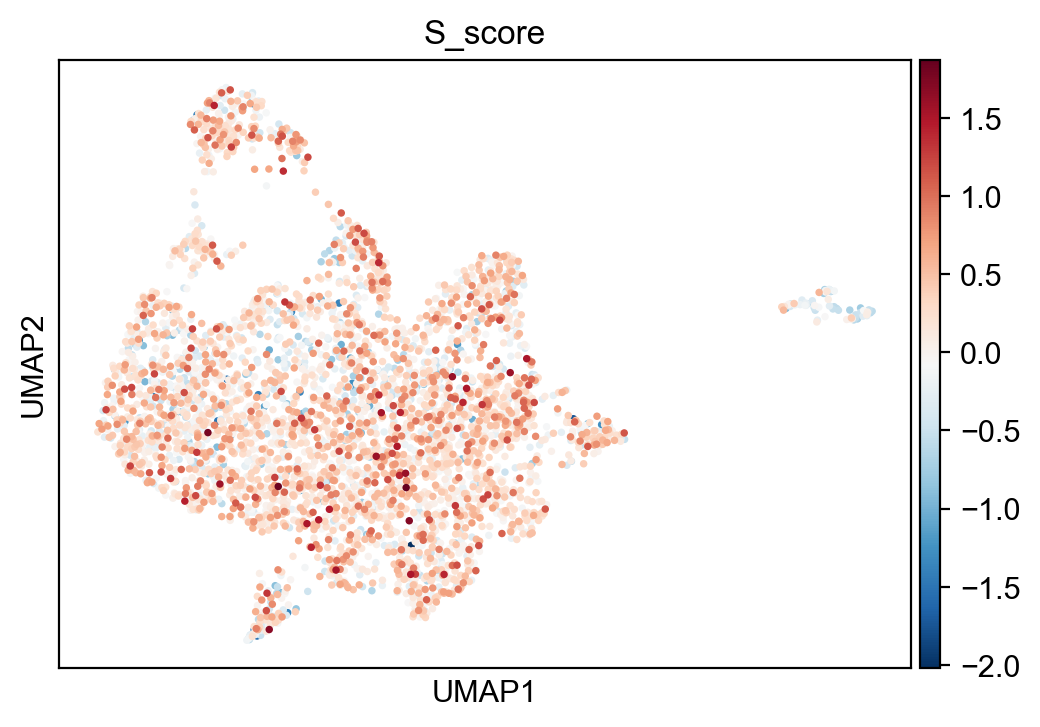

In [48]:
#Plot the S score on UMAP
sc.pl.umap(cycle, color = 'S_score')

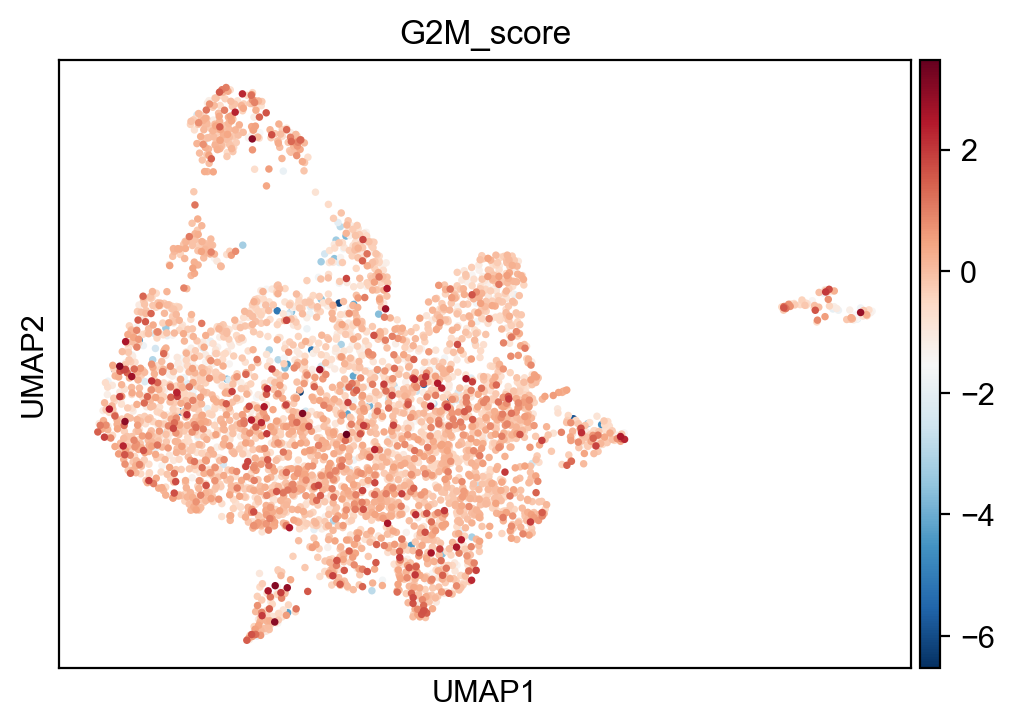

In [49]:
#Plot the G2M score on UMAP
sc.pl.umap(cycle, color = 'G2M_score')

In [5]:
#Rename clusters by cell types
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

cycle.obs.Clusters = cycle.obs.Clusters.astype('category')

cycle.obs['Name'] = str(cycle.obs.Clusters)
for i,j in cycle.obs.iterrows():
    if (j['Clusters'] == 0):
        cycle.obs.Name[i] = 'ENbl'
    if (j['Clusters'] == 1):
        cycle.obs.Name[i] = 'ENbl'
    if (j['Clusters'] == 2):
        cycle.obs.Name[i] = 'ENbl'
    if (j['Clusters'] == 3):
        cycle.obs.Name[i] = 'NEpitA3'
    if (j['Clusters'] == 4):
        cycle.obs.Name[i] = 'NEpitA2'
    if (j['Clusters'] == 5):
        cycle.obs.Name[i] = 'NEpitA1'
    if (j['Clusters'] == 6):
        cycle.obs.Name[i] = 'NEpitMd'
    if (j['Clusters'] == 7):
        cycle.obs.Name[i] = 'NEpitH'
    if (j['Clusters'] == 8):
        cycle.obs.Name[i] = 'NEpitMH'
    if (j['Clusters'] == 9):
        cycle.obs.Name[i] = 'NEpitH'
    if (j['Clusters'] == 10):
        cycle.obs.Name[i] = 'NEpit3'
    if (j['Clusters'] == 11):
        cycle.obs.Name[i] = 'NEpit4'
    if (j['Clusters'] == 12):
        cycle.obs.Name[i] = 'NEpit2'
    if (j['Clusters'] == 13):
        cycle.obs.Name[i] = 'NEpitB'
    if (j['Clusters'] == 14):
        cycle.obs.Name[i] = 'NEpitML'
    if (j['Clusters'] == 15):
        cycle.obs.Name[i] = 'NEpitC'
    if (j['Clusters'] == 16):
        cycle.obs.Name[i] = 'NMP'

In [111]:
cycle_df = pd.DataFrame({'Name' : cycle.obs['Name'], 'Phase' : cycle.obs['phase']})

In [113]:
cycle_counts = (cycle_df.groupby(['Phase'])['Name']
                     .value_counts()
                     .rename('Counts')
                     .reset_index()
                     .sort_values('Name'))

#### Absolute count of cells of each phase in each cell type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

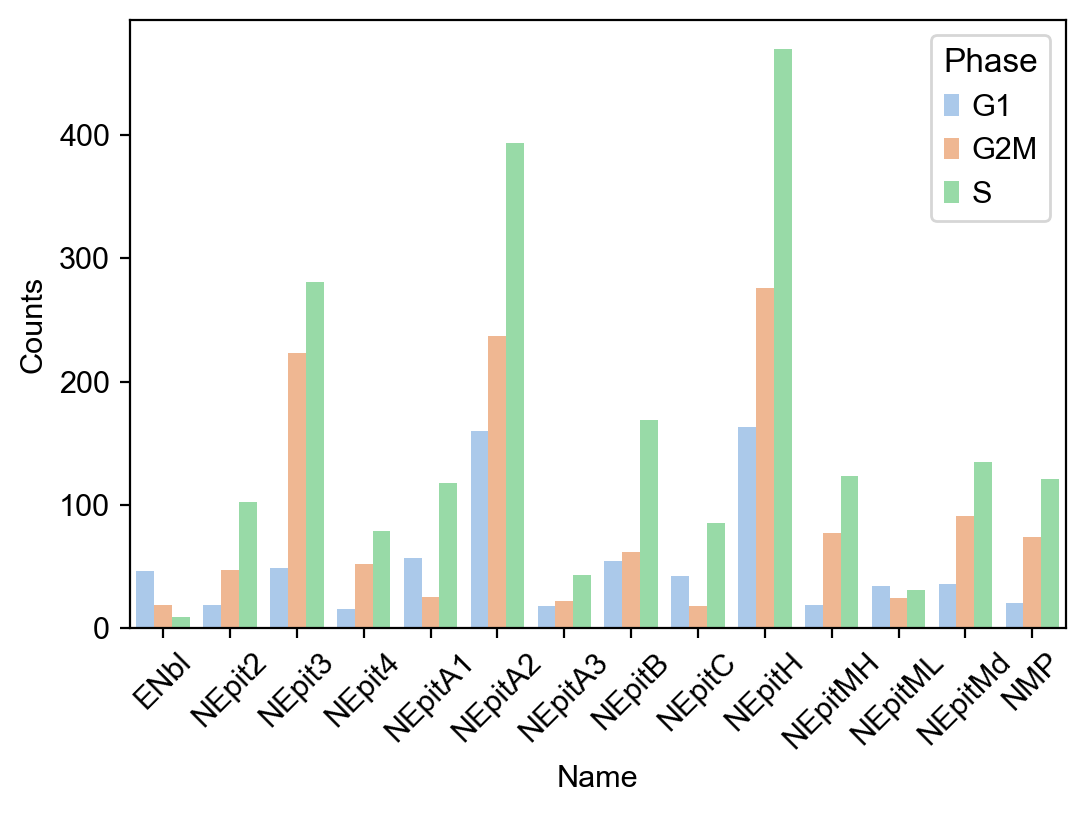

In [114]:
sns.barplot(x="Name", y="Counts", hue="Phase", data=cycle_counts, palette = 'pastel')
plt.xticks(rotation=45)

In [123]:
#Make it relative
cycle_counts = (cycle_df.groupby(['Name'])['Phase']
                     .value_counts(normalize=True)
                     .rename('Normalized_Counts')
                     .mul(100)
                     .reset_index()
                     .sort_values('Name'))

#### Relative counts of cells for each phase in each cell type (normalized to a 100)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

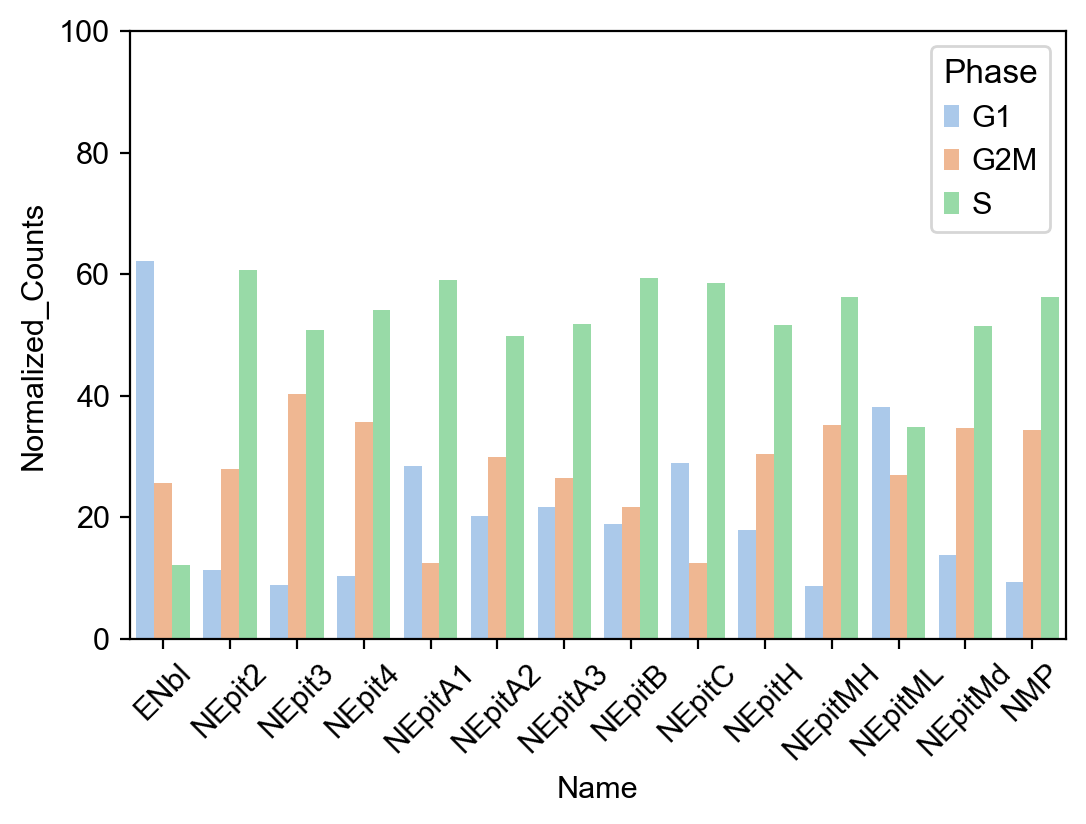

In [128]:
sns.barplot(x="Name", y="Normalized_Counts", hue="Phase", data=cycle_counts, palette = 'pastel')
plt.ylim(0,100)
plt.xticks(rotation=45)